**Imports**

Here we import all libraries we'll use and install `matplotlib` and `numby` modules needed for further work.

In [1]:
import sys
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install numpy


In [131]:
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import csv
import math

In [2]:
X = []
Y = []
with open('data.csv', 'r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in spamreader:
        X.append(int(row[0]))
        Y.append(int(row[1]))

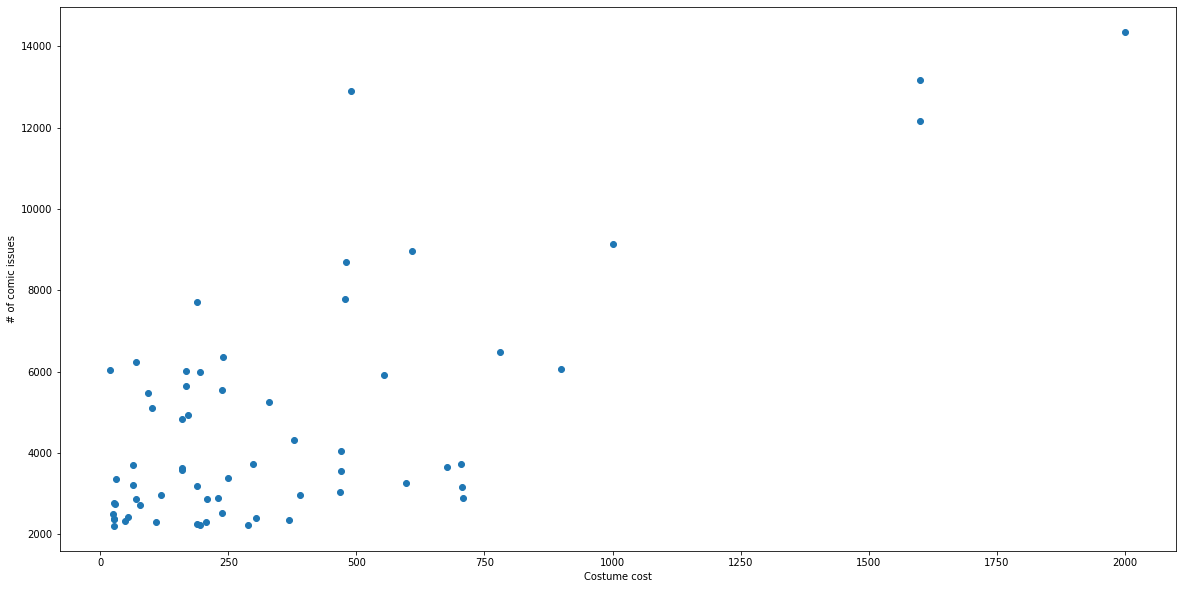

In [3]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.scatter(X,Y,marker="o")
plt.xlabel("Costume cost")
plt.ylabel("# of comic issues")
plt.show()

In [4]:
def generate_binary_phenotype(size: int):
    return [random.randrange(0, 2, 1) for i in range(size)]

def generate_population(population_size: int, phenotype_size: int, generator):
    return [generator(phenotype_size) for i in range(population_size)]

In [5]:
population = generate_population(100, 16, generate_binary_phenotype)

print(f"Population size: {len(population)}")
print(f"First individual: {str(population[0])}")

Population size: 100
First individual: [0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1]


In [69]:
def decode_individual(individual):
    half = int(len(individual)/2)
    a = int("".join(str(x) for x in individual[0:half]), 2)
    b = int("".join(str(x) for x in individual[half:]), 2)
    return a, b

def fitness_function(individual):
    a, b = decode_individual(individual)
    fitness = 0
    for i in range(len(X)):
        fitness = fitness + abs(Y[i] - (a*X[i]+b))
    return individual, fitness

In [9]:
test_individual = population[0]
test_individual, fitness_value = fitness_function(test_individual)
print(f"First individual: {str(test_individual)} has fitness value: {fitness_value}")

First individual: [0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1] has fitness value: 2498647


In [10]:
individual_fitness_pairs = list(map(fitness_function, population))
best = min(individual_fitness_pairs, key=lambda item: item[1])
worst = max(individual_fitness_pairs, key=lambda item: item[1])


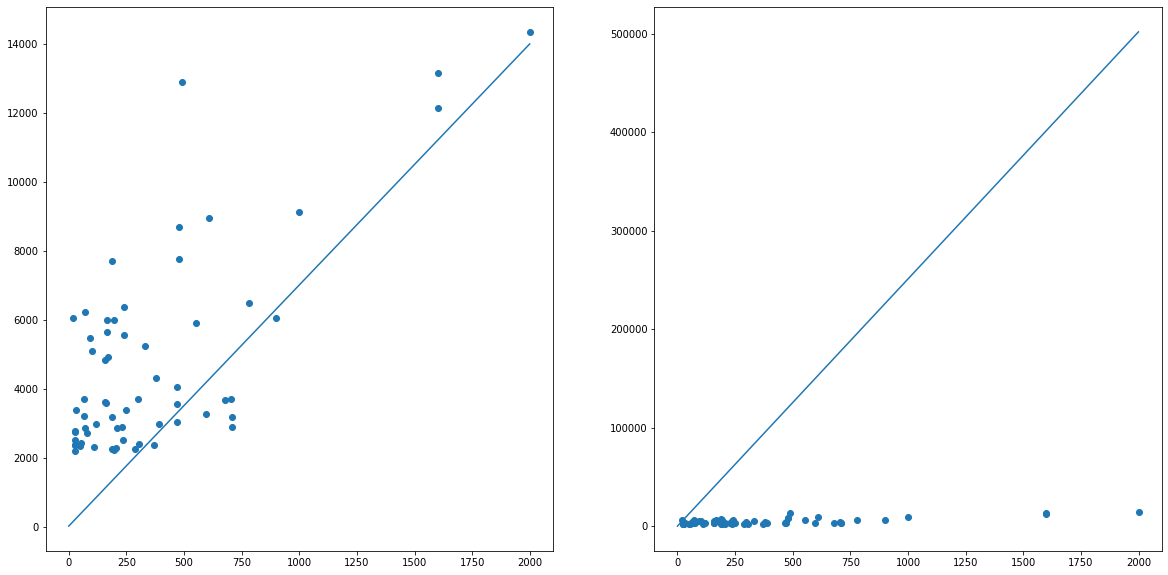

In [12]:
a_best, b_best = decode_individual(best[0])
a_worst, b_worst = decode_individual(worst[0])

plt.rcParams['figure.figsize'] = [20, 10]

figure, axis = plt.subplots(ncols=2)

x_best = np.arange(0.0, 2000.0, 1.0)
y_best = np.add(np.multiply(x_best,a_best), b_best)

x_worst = np.arange(0.0, 2000.0, 1.0)
y_worst = np.add(np.multiply(x_worst,a_worst), b_worst)

axis[0].scatter(X,Y,marker="o")
axis[1].scatter(X,Y,marker="o")
axis[0].plot(x_best, y_best)
axis[1].plot(x_worst, y_worst)

plt.show()

In [13]:
def mutation(individual, initial_mutation_rate):
    mutation_rate = 1/len(individual) if initial_mutation_rate < 0 else initial_mutation_rate
    new_phenotype = []
    for value in individual:
        new_phenotype.append( abs(value - 1) if random.random() < mutation_rate else value)
    return new_phenotype

print ("Original phenotype: " +  str(worst[0]))
mutant = mutation(worst[0], 0.5)
print ("Mutated phenotype : " +  str(mutant))

Original phenotype: [1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1]
Mutated phenotype : [0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0]


In [14]:
def recombination(individual_1, individual_2):
    crossover_point = random.randrange(1, len(individual_1), 1)
    child_1 = individual_1[:crossover_point] + individual_2[crossover_point:]
    child_2 = individual_2[:crossover_point] + individual_1[crossover_point:]
    return child_1, child_2

test_1 = [1, 1, 1, 1, 1, 1, 1, 1]
test_2 = [0, 0, 0, 0, 0, 0, 0, 0]
child_1, child_2 = recombination(test_1, test_2)
print(f"Children: {str(child_1)} & {str(child_2)}")

Children: [1, 1, 1, 0, 0, 0, 0, 0] & [0, 0, 0, 1, 1, 1, 1, 1]


In [51]:
test = [('a', 10), ('b', 17), ('c', 11)]
def simple_selection(individual_fitness_pairs):
    first = individual_fitness_pairs[random.randrange(0, len(individual_fitness_pairs), 1)]
    individual_fitness_pairs.remove(first)
    second = individual_fitness_pairs[random.randrange(0, len(individual_fitness_pairs), 1)]
    individual_fitness_pairs.remove(second)
    return first[0], second[0], individual_fitness_pairs

f, s, ind = monte_carlo_selection(test)

a
c
[('b', 17)]


In [132]:
test = [('a', 10), ('b', 17), ('c', 11)]
def monte_carlo_selection(individual_fitness_pairs):
    base = min(individual_fitness_pairs, key=lambda item: item[1])[1]
    rulette_wheel = []
    temp = list(map(lambda x : (x[0], math.ceil(10000/x[1])), individual_fitness_pairs))
    for index in range(len(temp)):
        rulette_wheel = rulette_wheel + temp[index][1]*[index]
    rand = random.randrange(0, len(rulette_wheel), 1)
    first = individual_fitness_pairs[rulette_wheel[rand]]
    rulette_wheel = [index for index in rulette_wheel if index != rulette_wheel[rand]]
    rand = random.randrange(0, len(rulette_wheel), 1)
    second = individual_fitness_pairs[rulette_wheel[rand]]
    individual_fitness_pairs.remove(first)
    individual_fitness_pairs.remove(second)
    return first[0], second[0], individual_fitness_pairs
    
f, s, ind = monte_carlo_selection(test)
print(f)
print(s)
print(str(ind))

a
b
[('c', 11)]


In [134]:
def breedResult(population, mutation_rate, elite_size, epochs, fitness_f, mutation_f, recombination_f, selection_f, ):
    pop_size = len(population)
    best_history = []
    current_population = population
    for epoch in range(epochs):
        new_population = []
        individual_fitness_pairs = list(map(fitness_f, current_population))
        individual_fitness_pairs.sort(key=lambda x : x[1])
        best_history.append(individual_fitness_pairs[0][0])
        new_population = new_population + [individual[0] for individual in individual_fitness_pairs][:elite_size]
        while len(new_population) < pop_size:
            first, second, individual_fitness_pairs = selection_f(individual_fitness_pairs)
            first, second = recombination_f(first, second)
            first = mutation_f(first, mutation_rate)
            second = mutation_f(second, mutation_rate)
            new_population.append(first)
            new_population.append(second)
        current_population = new_population
    return best_history

results = breedResult(population, -1, 10, 100, fitness_function, mutation, recombination, monte_carlo_selection)

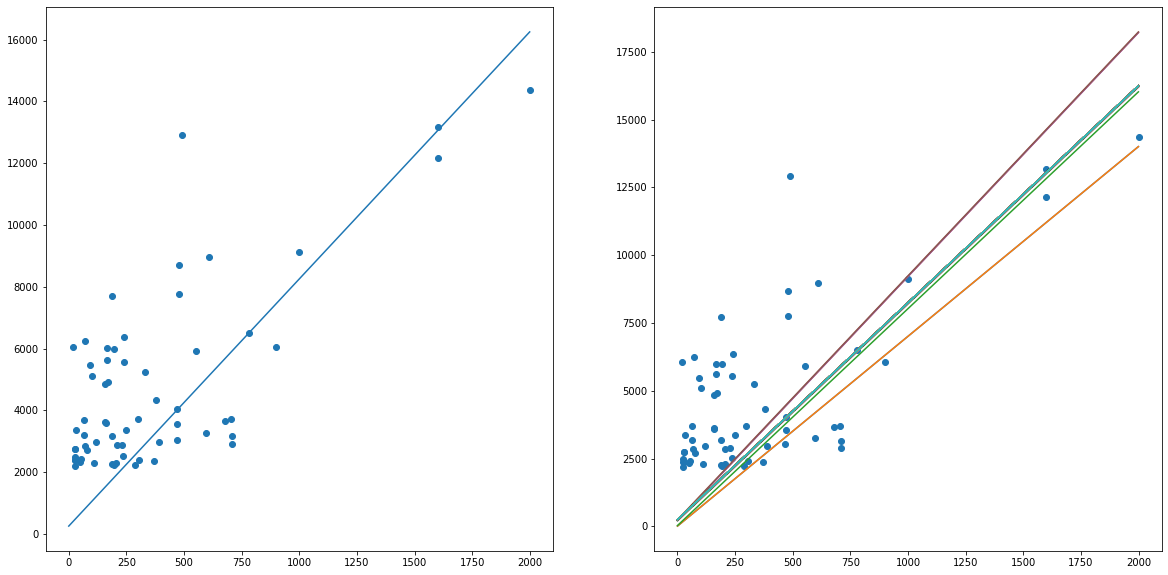

In [135]:
a_best, b_best = decode_individual(results[-1])

plt.rcParams['figure.figsize'] = [20, 10]

figure, axis = plt.subplots(ncols=2)

x_best = np.arange(0.0, 2000.0, 1.0)
y_best = np.add(np.multiply(x_best,a_best), b_best)

x_worst = np.arange(0.0, 2000.0, 1.0)
for result in results:
    current = decode_individual(result)
    a_worst, b_worst = decode_individual(result)
    y_worst = np.add(np.multiply(x_worst,a_worst), b_worst)
    axis[1].plot(x_worst, y_worst)

axis[0].scatter(X,Y,marker="o")
axis[1].scatter(X,Y,marker="o")
axis[0].plot(x_best, y_best)

plt.show()